In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

Question 1

In [19]:
def new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng):

    if data_type == "linear":
        classA = rng.standard_normal((2, n))*sigmaA + np.repeat(mA, n, axis=1)
        classB = rng.standard_normal((2, n))*sigmaB + np.repeat(mB, n, axis=1)


    elif data_type == "nonlinear":
        N = n+n

        #First coord classA
        classA00 = rng.standard_normal((1, int(n / 2))) * sigmaA + mA[0]
        classA01 = rng.standard_normal((1, int(n / 2))) * sigmaA - mA[0]
        classA0 = np.concatenate((classA00, classA01), axis=1) #left and right clusters
        #Second coord classA
        classA1 = rng.standard_normal((1, n))*sigmaA + mA[1]

        classA = np.concatenate((classA0, classA1), axis=0)
        classB = rng.standard_normal((2, n))*sigmaB + np.repeat(mB, n, axis=1)

    X2D = np.concatenate((classA, classB), axis = 1)
    X = np.concatenate((X2D, np.ones((1, n+n))), axis = 0)

    T = np.concatenate((np.ones(n), -np.ones(n)))

    shuffler = rng.permutation(n+n)
    X = X[:, shuffler]  #X = X2D quand on enlève le biais
    T = T[shuffler]

    return X, T     #retourner X2D quand on retire le biais 

def plot_data(X, T):
    plt.scatter(X[0, :], X[1, :], c=T)
    plt.grid()

def plot_boundaries(W):
    x = np.linspace(-1, 3, 100)
    y = - ( W[2] + W[0]*x ) / W[1]

    plt.plot(x, y, color='red')

def plot_boundaries_multiple(W1,W2):
    x1 = np.linspace(-1, 3, 100)
    y1 = - ( W1[2] + W1[0]*x1 ) / W1[1]

    x2 = np.linspace(-1, 3, 100)
    y2 = - ( W2[2] + W2[0]*x1 ) / W2[1]

    
    plt.plot(x1, y1, color='red')
    plt.plot(x2, y2, color='blue')


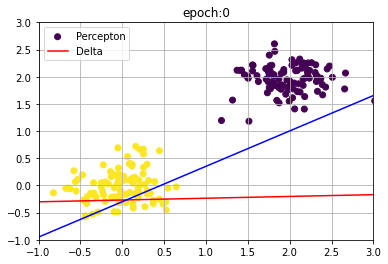

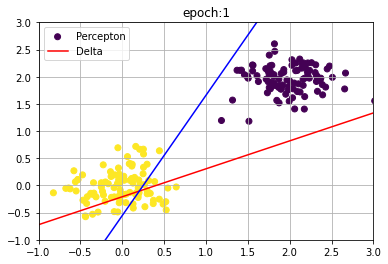

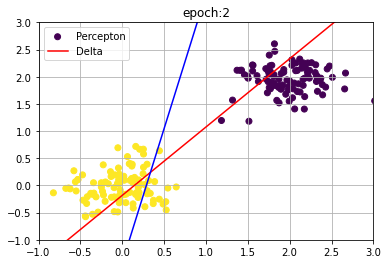

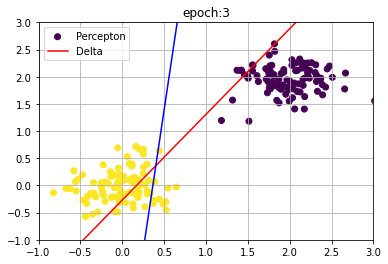

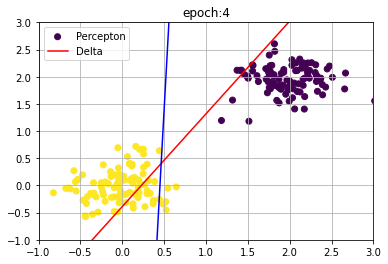

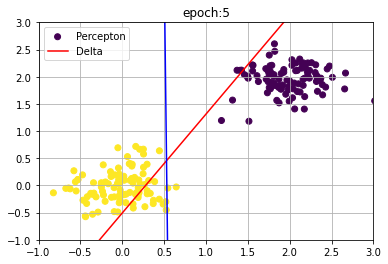

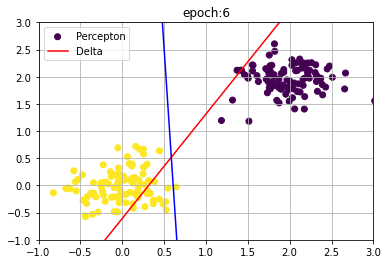

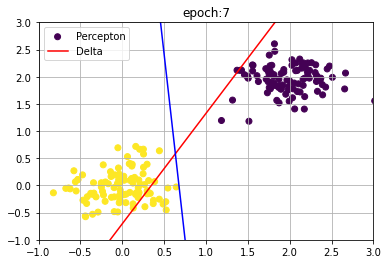

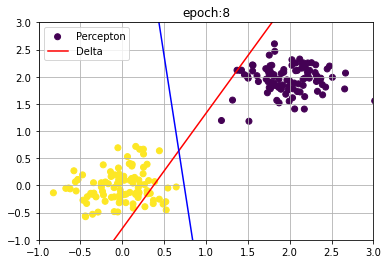

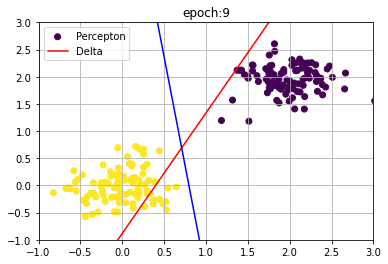

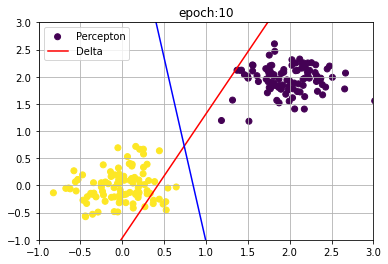

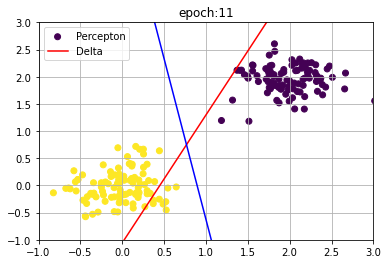

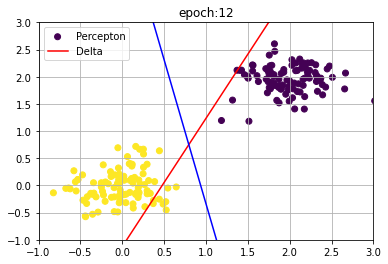

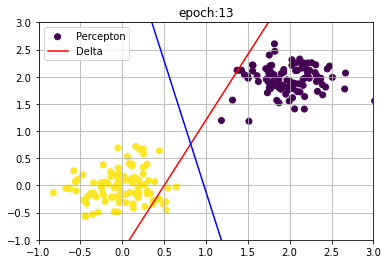

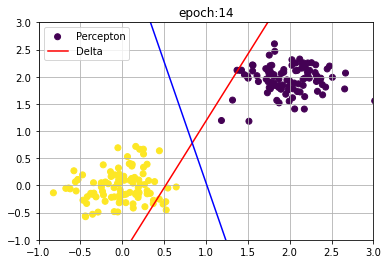

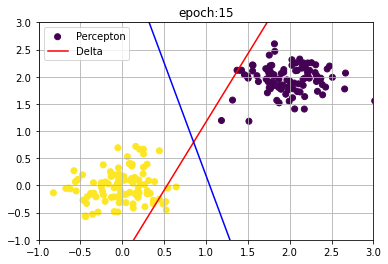

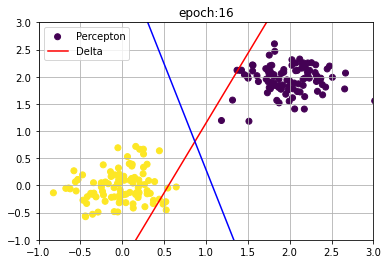

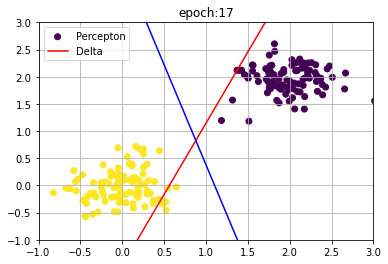

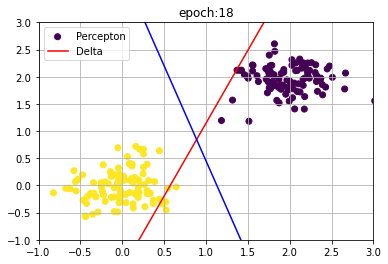

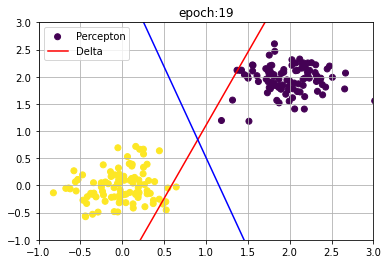

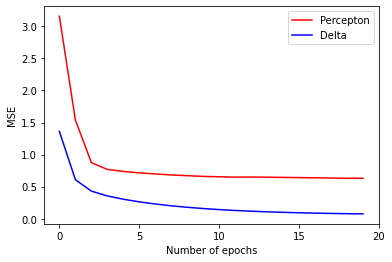

In [3]:
#PERCEPTRON VS DELTA ONLINE

##########Data##########


n = 100
mA = np.array([[0.0], [0.0]])
mB = np.array([[2.0], [2.0]])
sigmaA = 0.3
sigmaB = 0.3

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#plot_data(X, T)

epochs = 20
eta = 1e-3

W = rng.random((3))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]


#########Data##########

plt.ion()

W_perc = copy.deepcopy(W)
W_delta = copy.deepcopy(W)

the_mse_perc = []
the_mse_delta = []
for epoch in range(epochs):
    mse = 0
    for i in range(N):
        y_prime = W_perc@X[:, i]
        if y_prime > 0:
            y = 1
        else:
            y = 0
        e = int(T[i]>0) - y
        mse += e**2 #computing mean square error
        deltaW_perc = eta * e * X[:, i]
        W_perc += deltaW_perc
    

    for i in range(N):
        e = T[i] - W_delta@X[:, i]
        deltaW_delta = eta * e * X[:, i]
        W_delta += deltaW_delta
    
    the_mse_perc.append(np.mean((W_perc@X-T)**2))
    the_mse_delta.append(np.mean((W_delta@X-T)**2))

    plt.clf()
    plot_data(X, T)
    plot_boundaries_multiple(W_perc, W_delta)
    plt.legend(["Percepton", "Delta"])
    plt.xlim([-1, 3])
    plt.ylim([-1, 3])
    #plot_boundaries_multiple(W_perc, W_delta)
    plt.title(f"epoch:{epoch}")
    plt.pause(0.1)

plt.ioff()



plt.figure()
plt.plot(range(epochs), the_mse_perc, color='red')
plt.plot(range(epochs), the_mse_delta, color='blue')
plt.xticks([0,5,10,15,20])
plt.legend(["Percepton", "Delta"])
plt.ylabel("MSE")
plt.xlabel('Number of epochs')
plt.show()


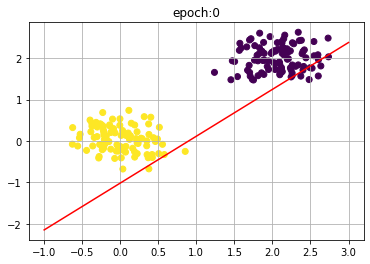

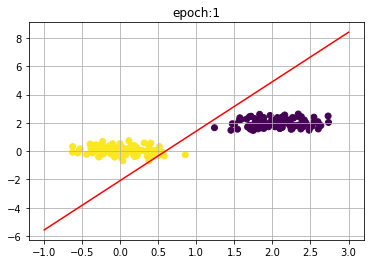

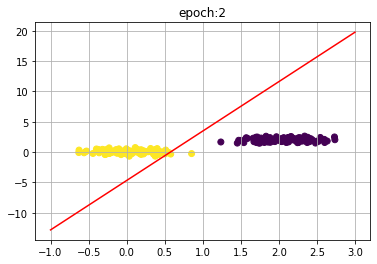

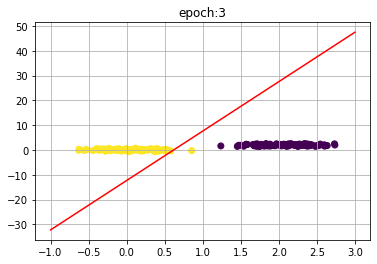

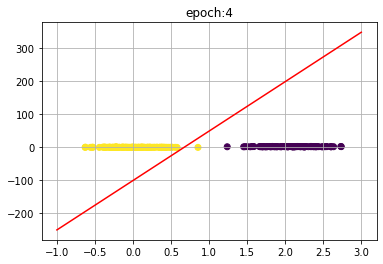

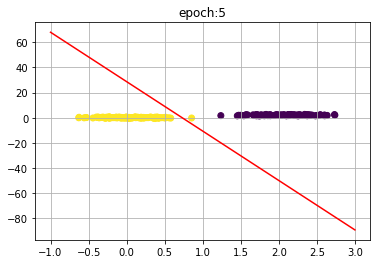

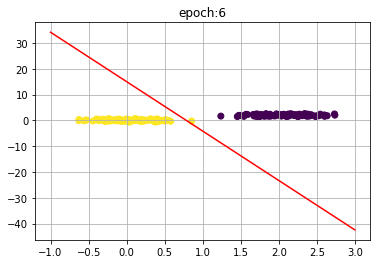

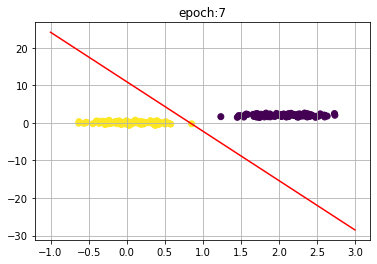

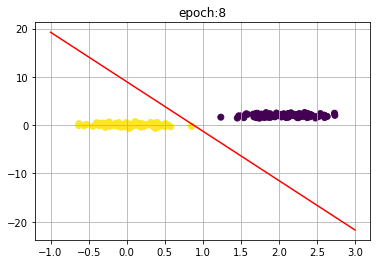

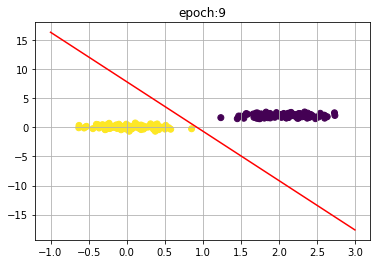

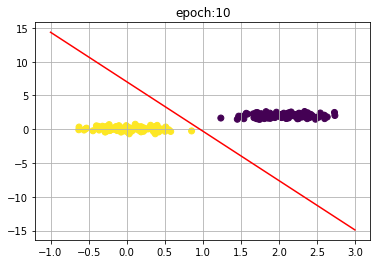

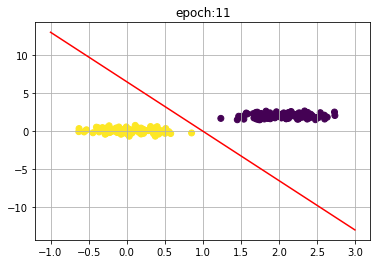

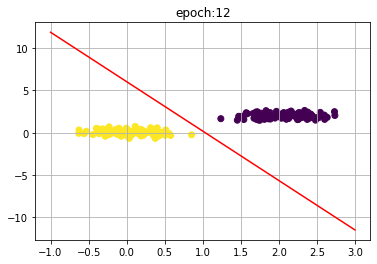

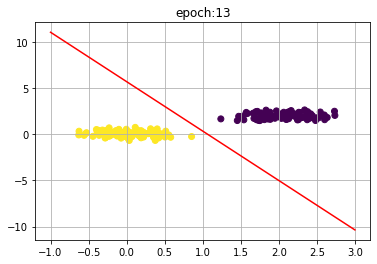

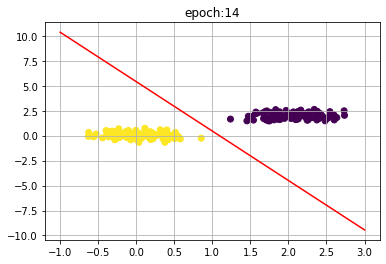

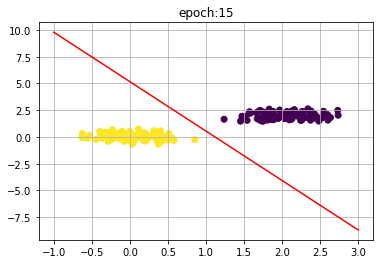

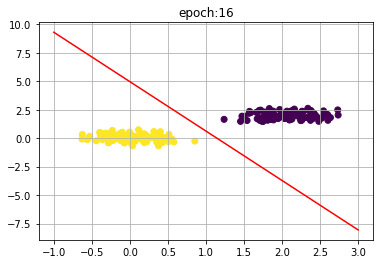

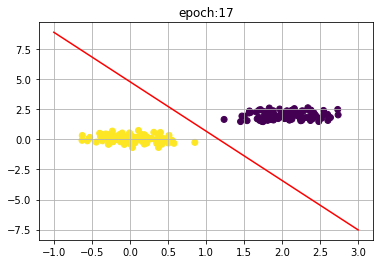

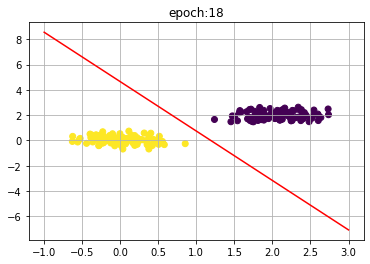

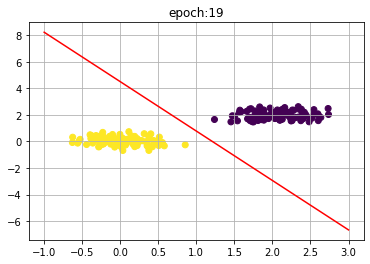

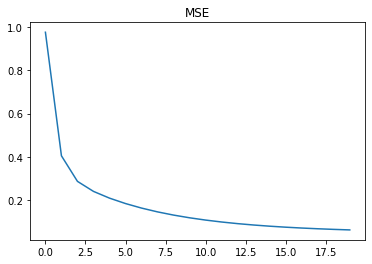

In [4]:
#DELTA ONLINE
plt.ion()

#########Data##########

n = 100
mA = np.array([[0.0], [0.0]])
mB = np.array([[2.0], [2.0]])
sigmaA = 0.3
sigmaB = 0.3

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#plot_data(X, T)

epochs = 20
eta = 1e-3

W = rng.random((3))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]
W_online = copy.deepcopy(W)

#########Data##########

the_mse_delta = []
for epoch in range(epochs):
    for i in range(N):
        e = T[i] - W_online@X[:, i]
        deltaW = eta * e * X[:, i]
        W_online += deltaW
    the_mse_delta.append(np.mean((W_online@X-T)**2))
    plt.clf()
    plot_data(X, T)
    plot_boundaries(W_online)
    plt.title(f"epoch:{epoch}")
    plt.pause(0.2)

plt.ioff()

plt.figure()
plt.plot(range(epochs), the_mse_delta)
plt.title("MSE")
plt.show()


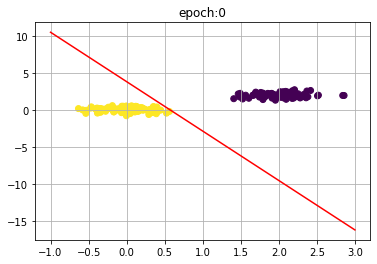

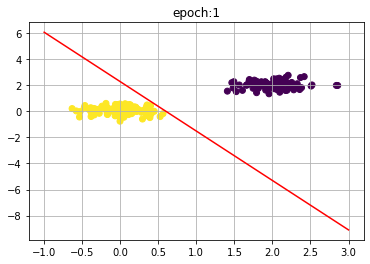

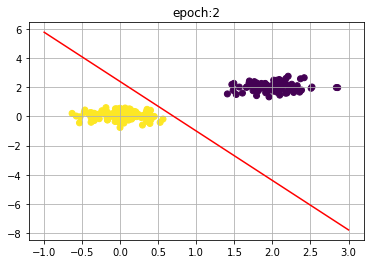

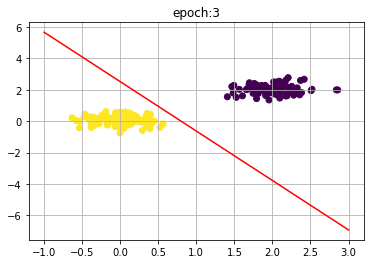

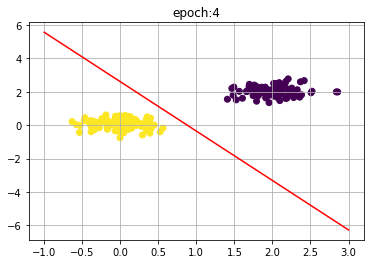

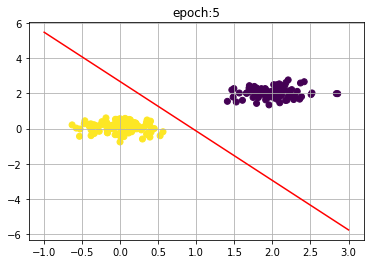

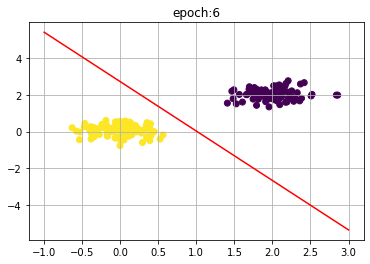

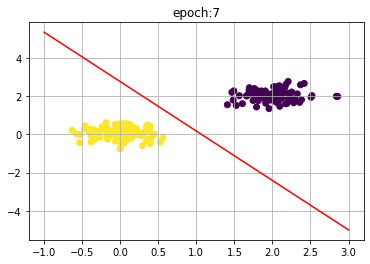

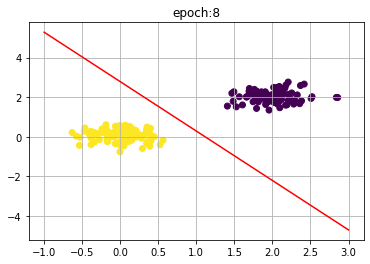

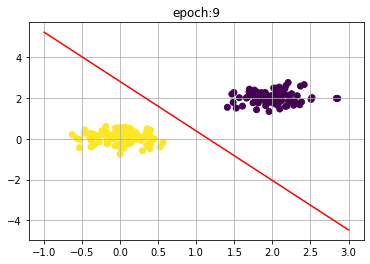

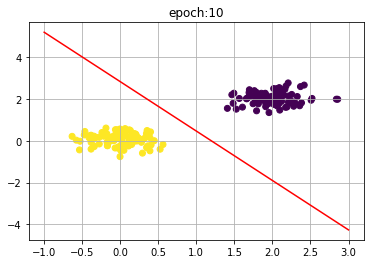

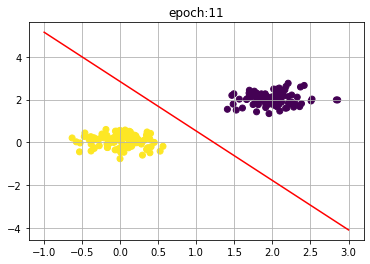

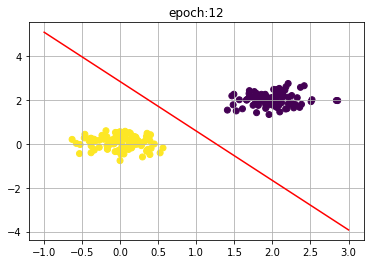

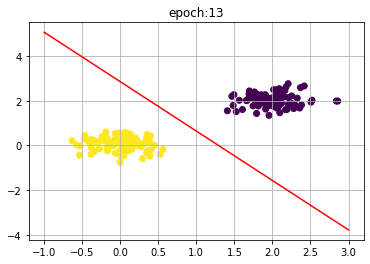

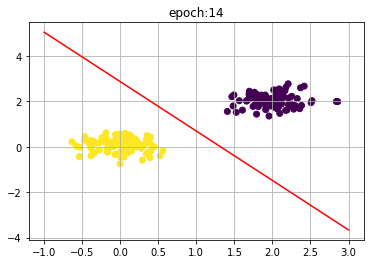

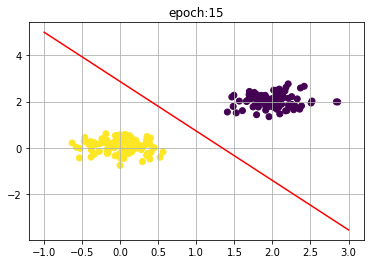

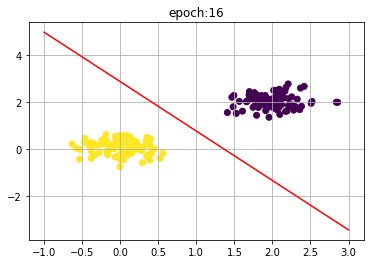

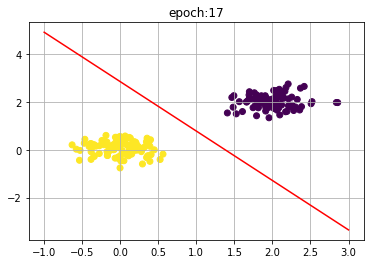

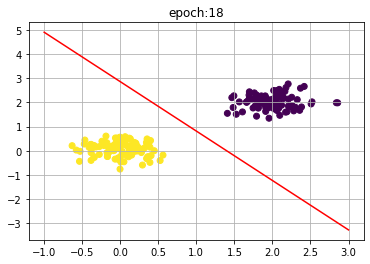

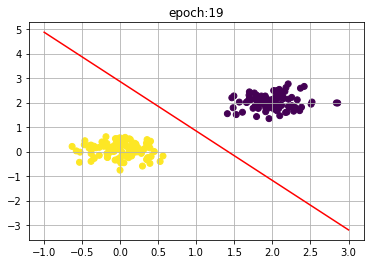

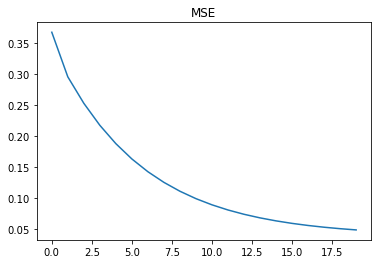

In [5]:
#DELTA BATCH
plt.ion()

#########Data##########

n = 100
mA = np.array([[0.0], [0.0]])
mB = np.array([[2.0], [2.0]])
sigmaA = 0.3
sigmaB = 0.3

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#plot_data(X, T)

epochs = 20
eta = 1e-3

W = rng.random((3))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]
W_online = copy.deepcopy(W)

#########Data##########

W_batch = copy.deepcopy(W)
mse = []
for epoch in range(epochs):

    W_batch += - eta * (W_batch@X - T) @ X.T

    mse.append(np.mean((W_batch @ X - T) ** 2))
    plt.clf()
    plot_data(X, T)
    plot_boundaries(W_batch)
    plt.title(f"epoch:{epoch}")
    plt.pause(0.2)

plt.ioff()

plt.figure()
plt.plot(range(epochs), mse)
plt.title("MSE")
plt.show()

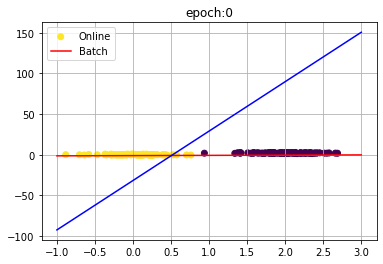

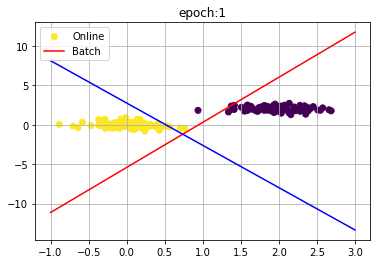

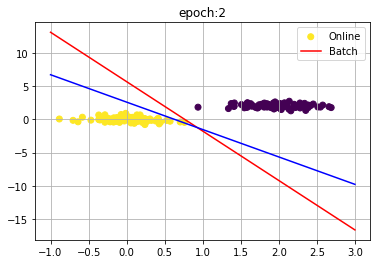

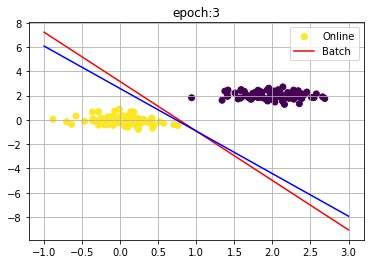

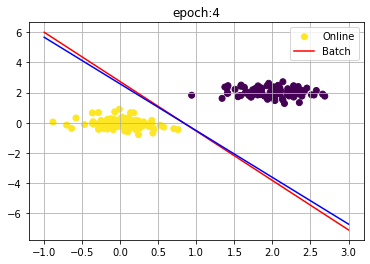

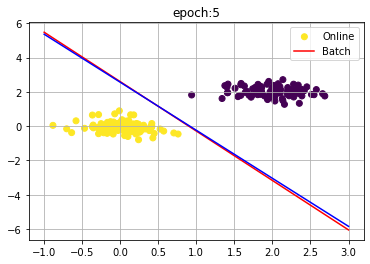

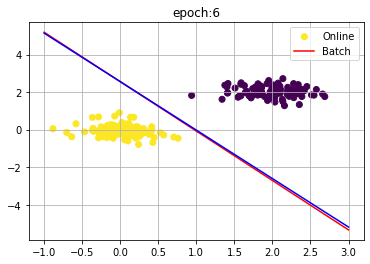

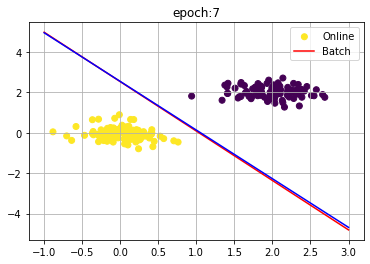

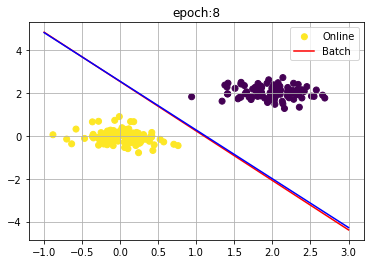

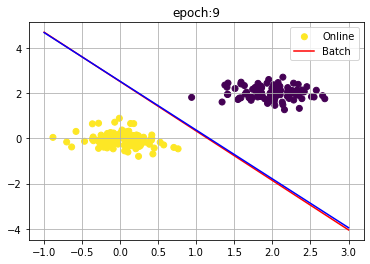

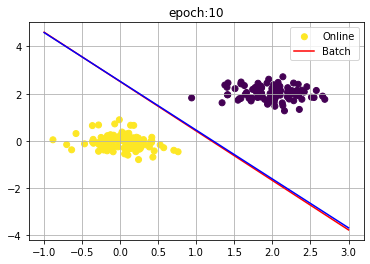

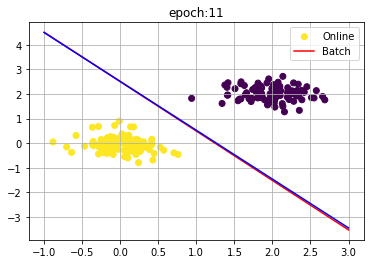

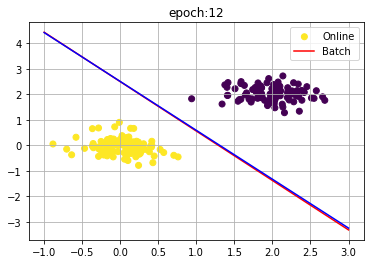

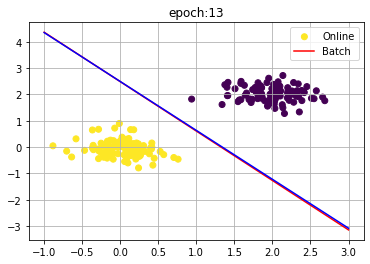

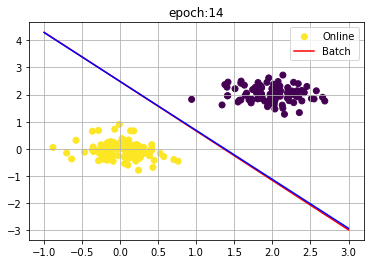

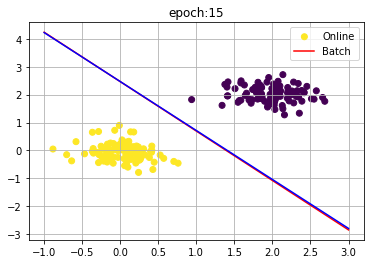

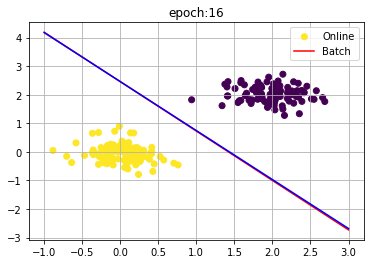

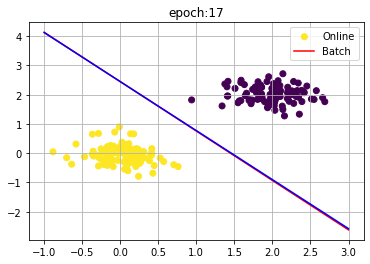

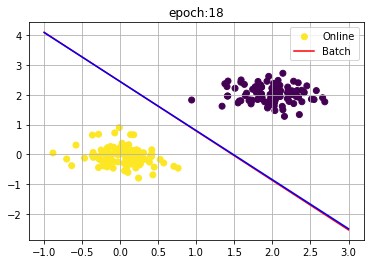

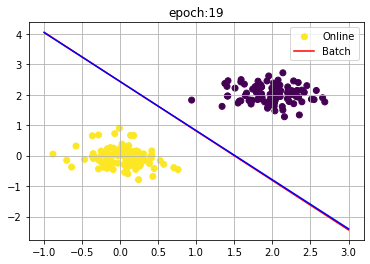

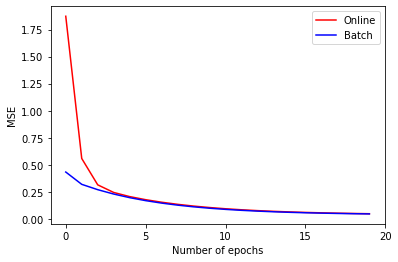

In [6]:
#DELTA ONLINE VS BATCH
plt.ion()


#########Data##########

n = 100
mA = np.array([[0.0], [0.0]])
mB = np.array([[2.0], [2.0]])
sigmaA = 0.3
sigmaB = 0.3

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#plot_data(X, T)

epochs = 20
eta = 1e-3

W = rng.random((3))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]
W_online = copy.deepcopy(W)

#########Data##########


W_online = copy.deepcopy(W)
W_batch = copy.deepcopy(W)

the_mse_online = []
the_mse_batch = []
for epoch in range(epochs):
    for i in range(N):
        e = T[i] - W_online@X[:, i]
        deltaW = eta * e * X[:, i]
        W_online += deltaW
    the_mse_online.append(np.mean((W_online@X-T)**2))

    W_batch += - eta * (W_batch@X - T) @ X.T
    the_mse_batch.append(np.mean((W_batch @ X - T) ** 2))

    plt.clf()
    plot_data(X, T)
    plot_boundaries_multiple(W_online, W_batch)
    plt.title(f"epoch:{epoch}")
    plt.legend(["Online", "Batch"])
    plt.pause(0.2)

plt.ioff()

plt.figure()
plt.plot(range(epochs), the_mse_online, color='red')
plt.plot(range(epochs), the_mse_batch, color='blue')
plt.xticks([0,5,10,15,20])
plt.legend(["Online", "Batch"])
plt.ylabel("MSE")
plt.xlabel('Number of epochs')
plt.show()

Question 2

Question 3

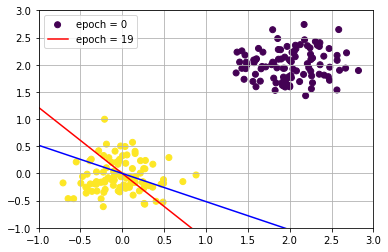

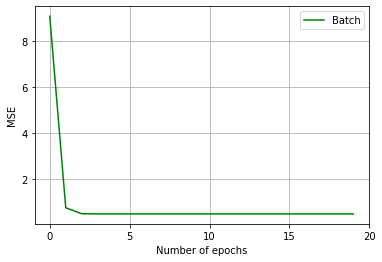

In [7]:
#Delta Rule Batch mode without bias - Data not symmetrical

def new_data_without_bias(mA, mB, sigmaA, sigmaB, n, data_type, rng):

    if data_type == "linear":
        classA = rng.standard_normal((2, n))*sigmaA + np.repeat(mA, n, axis=1)
        classB = rng.standard_normal((2, n))*sigmaB + np.repeat(mB, n, axis=1)

        X2D = np.concatenate((classA, classB), axis = 1)
        

        T = np.concatenate((np.ones(n), -np.ones(n)))

        shuffler = rng.permutation(n+n)
        X2D = X2D[:, shuffler]
        T = T[shuffler]

    return X2D, T     #retourner X2D quand on retire le biais 


def plot_boundaries_without_bias(W):
    x = np.linspace(-1, 3, 100)
    y = - ( W[0]*x ) / W[1]

    plt.plot(x, y, color='red')

def plot_boundaries_multiple_without_bias(W1,W2):
    x1 = np.linspace(-1, 3, 100)
    y1 = - (W1[0]*x1 ) / W1[1]

    x2 = np.linspace(-1, 3, 100)
    y2 = - ( W2[0]*x1 ) / W2[1]

    
    plt.plot(x1, y1, color='red')
    plt.plot(x2, y2, color='blue')



#########Data##########


n = 100
mA = np.array([[0.0], [0.0]])
mB = np.array([[2.0], [2.0]])
sigmaA = 0.3
sigmaB = 0.3

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data_without_bias(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#plot_data(X, T)

epochs = 20
eta = 1e-3

W = rng.random((2))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]

#########Data##########

plt.ion()

W_batch = copy.deepcopy(W)
the_boundaries = [W_batch]
mse = []
for epoch in range(epochs):
    #print(W_batch.shape)
    #print(X.shape)
    #print(T.shape)

    the_boundaries.append(the_boundaries[epoch] - eta * (the_boundaries[epoch]@X - T) @ X.T)
    #the_boundaries.append(W_batch)

    mse.append(np.mean((the_boundaries[epoch] @ X - T) ** 2))

plt.clf()
plot_data(X, T)

plot_boundaries_multiple_without_bias(the_boundaries[0], the_boundaries[-1])
plt.xlim([-1, 3])
plt.ylim([-1, 3])
plt.legend(["epoch = 0", "epoch = 19"])
plt.pause(0.2)

plt.ioff()

plt.figure()
plt.plot(range(epochs), mse, color='green')
plt.xticks([0,5,10,15,20])
plt.legend(["Batch"])
plt.ylabel("MSE")
plt.xlabel('Number of epochs')
plt.grid()
plt.show()


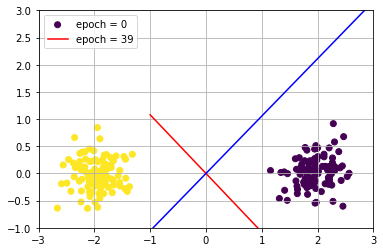

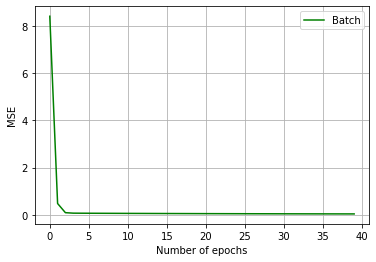

In [8]:
#Delta Rule Batch mode without bias - Data symmetrical

def new_data_without_bias(mA, mB, sigmaA, sigmaB, n, data_type, rng):

    if data_type == "linear":
        classA = rng.standard_normal((2, n))*sigmaA + np.repeat(mA, n, axis=1)
        classB = rng.standard_normal((2, n))*sigmaB + np.repeat(mB, n, axis=1)

        X2D = np.concatenate((classA, classB), axis = 1)
        

        T = np.concatenate((np.ones(n), -np.ones(n)))

        shuffler = rng.permutation(n+n)
        X2D = X2D[:, shuffler]
        T = T[shuffler]

    return X2D, T     #retourner X2D quand on retire le biais 


def plot_boundaries_without_bias(W):
    x = np.linspace(-1, 3, 100)
    y = - ( W[0]*x ) / W[1]

    plt.plot(x, y, color='red')

def plot_boundaries_multiple_without_bias(W1,W2):
    x1 = np.linspace(-1, 3, 100)
    y1 = - (W1[0]*x1 ) / W1[1]

    x2 = np.linspace(-1, 3, 100)
    y2 = - ( W2[0]*x1 ) / W2[1]

    
    plt.plot(x1, y1, color='red')
    plt.plot(x2, y2, color='blue')
    



#########Data##########


n = 100
mA = np.array([[-2.0], [0.0]])
mB = np.array([[2.0], [0.0]])
sigmaA = 0.3
sigmaB = 0.3

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data_without_bias(mA, mB, sigmaA, sigmaB, n, data_type, rng)


epochs = 40
eta = 1e-3

W = rng.random((2))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]

#########Data##########


plt.ion()

W_batch = copy.deepcopy(W)
the_boundaries = [W_batch]
mse = []
for epoch in range(epochs):
    #print(W_batch.shape)
    #print(X.shape)
    #print(T.shape)

    the_boundaries.append(the_boundaries[epoch] - eta * (the_boundaries[epoch]@X - T) @ X.T)
    #the_boundaries.append(W_batch)

    mse.append(np.mean((the_boundaries[epoch] @ X - T) ** 2))

plt.clf()
plot_data(X, T)
plot_boundaries_multiple_without_bias(the_boundaries[0], the_boundaries[-1])
plt.xlim([-3, 3])
plt.ylim([-1, 3])
plt.legend(["epoch = 0", "epoch = 39"])
plt.pause(0.2)

plt.ioff()

plt.figure()
plt.plot(range(epochs), mse, color='green')
plt.xticks([0,5,10,15,20,25,30,35,40])
plt.legend(["Batch"])
plt.ylabel("MSE")
plt.xlabel('Number of epochs')
plt.grid()
plt.show()


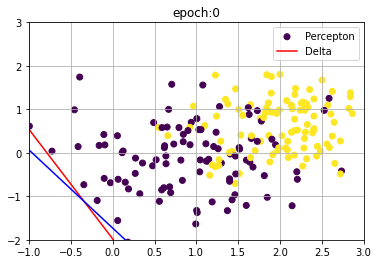

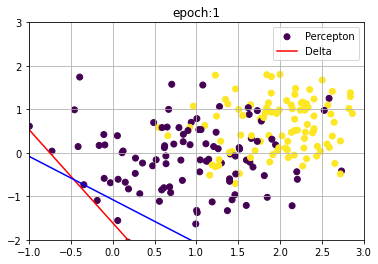

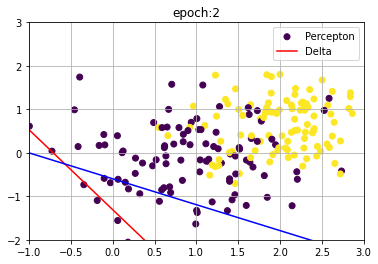

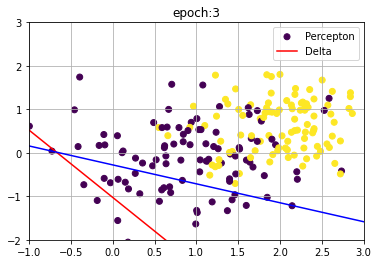

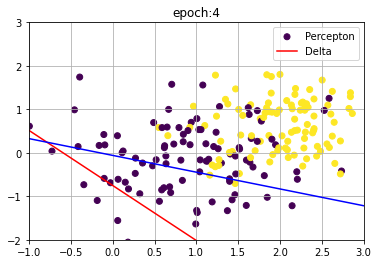

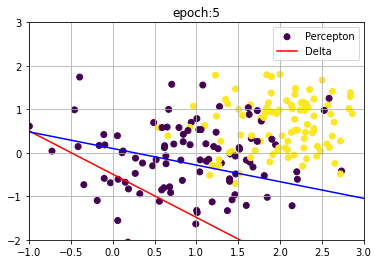

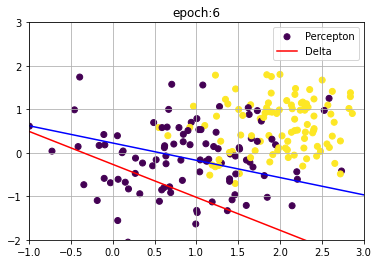

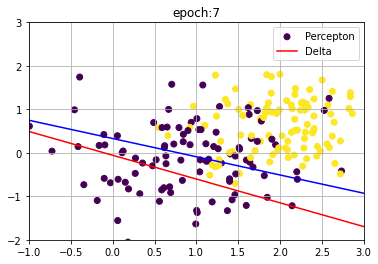

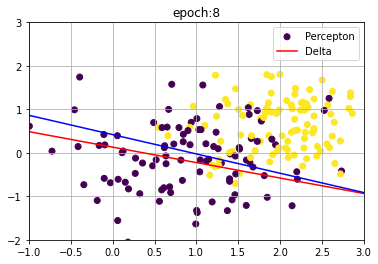

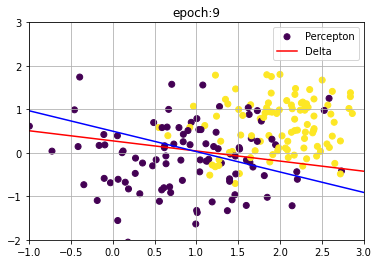

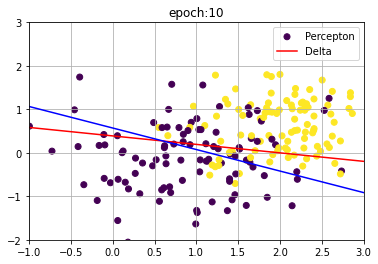

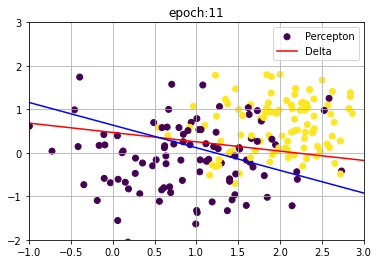

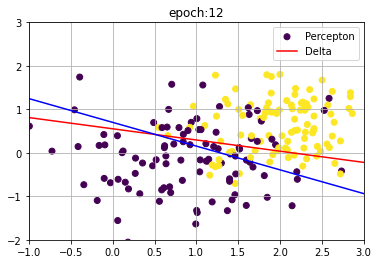

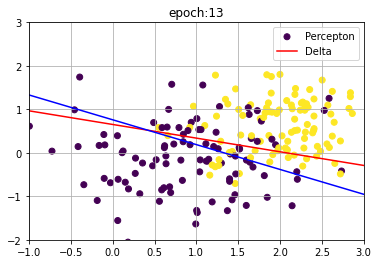

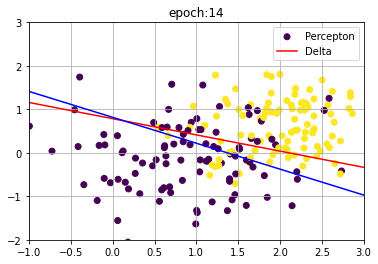

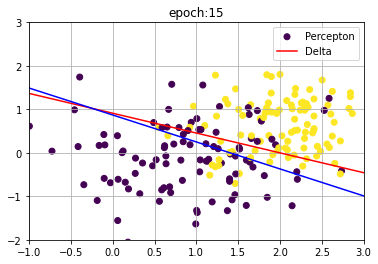

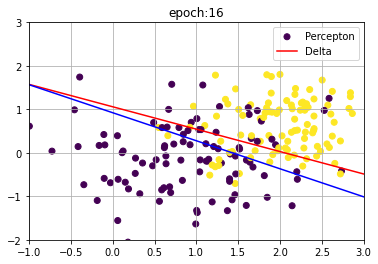

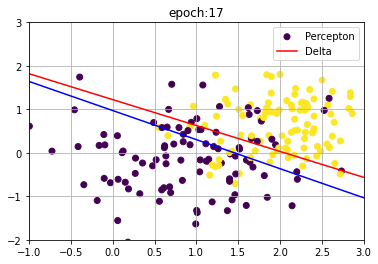

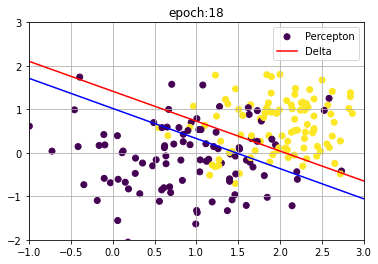

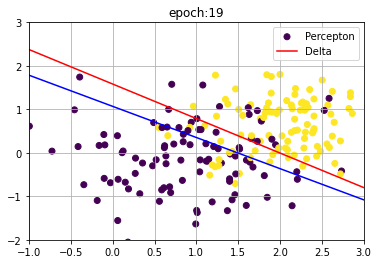

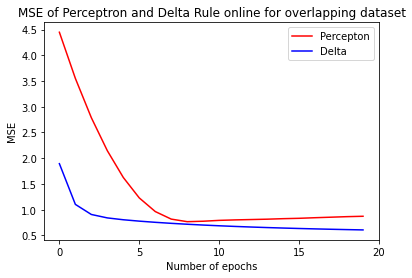

In [23]:
#Classification of samples that are not linearly separable - Linear but overlapping

#PERCEPTRON VS DELTA ONLINE

#########Data##########


n = 100
mA = np.array([[2], [0.5]])
mB = np.array([[1], [0.0]])
sigmaA = 0.6
sigmaB = 0.8

data_type = "linear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#plot_data(X, T)

epochs = 20
eta = 1e-3

W = rng.random((3))   #mettre 2 pour retirer le biais
#W = rng.standard_normal((3))
N = X.shape[1]


#########Data##########

plt.ion()

W_perc = copy.deepcopy(W)
W_delta = copy.deepcopy(W)

the_mse_perc = []
the_mse_delta = []
for epoch in range(epochs):
    mse = 0
    for i in range(N):
        y_prime = W_perc@X[:, i]
        if y_prime > 0:
            y = 1
        else:
            y = 0
        e = int(T[i]>0) - y
        mse += e**2 #computing mean square error
        deltaW_perc = eta * e * X[:, i]
        W_perc += deltaW_perc
    

    for i in range(N):
        e = T[i] - W_delta@X[:, i]
        deltaW_delta = eta * e * X[:, i]
        W_delta += deltaW_delta
    
    the_mse_perc.append(np.mean((W_perc@X-T)**2))
    the_mse_delta.append(np.mean((W_delta@X-T)**2))

    plt.clf()
    plot_data(X, T)
    plot_boundaries_multiple(W_perc, W_delta)
    plt.xlim([-1, 3])
    plt.ylim([-2, 3])
    plt.legend(["Percepton", "Delta"])
    #plot_boundaries_multiple(W_perc, W_delta)
    plt.title(f"epoch:{epoch}")
    plt.pause(0.1)

plt.ioff()



plt.figure()
plt.plot(range(epochs), the_mse_perc, color='red')
plt.plot(range(epochs), the_mse_delta, color='blue')
plt.xticks([0,5,10,15,20])
plt.legend(["Percepton", "Delta"])
plt.ylabel("MSE")
plt.xlabel('Number of epochs')
plt.title('MSE of Perceptron and Delta Rule online for overlapping dataset')
plt.show()


In [24]:
#Classification of samples that are not linearly separable

#PERCEPTRON VS DELTA ONLINE

#########Data##########


def subsample(n, scenario):
    N = n + n

    # First coord classA
    classA00 = rng.standard_normal((1, int(n / 2))) * sigmaA + mA[0]
    classA01 = rng.standard_normal((1, int(n / 2))) * sigmaA - mA[0]
    classA0 = np.concatenate((classA00, classA01), axis=1)  # left and right clusters
    # Second coord classA
    classA1 = rng.standard_normal((1, n)) * sigmaA + mA[1]

    if scenario == 1:
        m = 75
        p = 75
        classA = np.concatenate((classA0, classA1), axis=0)
        classA = rng.choice(classA.T, size=m).T

        classB = rng.standard_normal((2, n)) * sigmaB + np.repeat(mB, n, axis=1)
        classB = rng.choice(classB.T, size=p).T

        print(classA.shape)
        print(classB.shape)

    elif scenario == 2:
        m = 50

        classA = np.concatenate((classA0, classA1), axis=0)
        classA = rng.choice(classA.T, size=m).T

        classB = rng.standard_normal((2, n)) * sigmaB + np.repeat(mB, n, axis=1)
        p = classB.shape[1]

        print(classA.shape)
        print(classB.shape)

    elif scenario == 3:
        p = 50

        classA = np.concatenate((classA0, classA1), axis=0)
        m = classA.shape[1]

        classB = rng.standard_normal((2, n)) * sigmaB + np.repeat(mB, n, axis=1)
        classB = rng.choice(classB.T, size=p).T

        print(classA.shape)
        print(classB.shape)

    elif scenario == 4:
        m0 = 10
        m1 = 40

        classA00 = rng.standard_normal((1, int(n / 2))) * sigmaA + mA[0]
        classA00 = rng.choice(classA00.T, size=m0).T
        classA01 = rng.standard_normal((1, int(n / 2))) * sigmaA - mA[0]
        classA01 = rng.choice(classA01.T, size=m1).T

        classA0 = np.concatenate((classA00, classA01), axis=1)  # left and right clusters
        # Second coord classA
        classA1 = rng.standard_normal((1, m0+m1)) * sigmaA + mA[1]

        classA = np.concatenate((classA0, classA1), axis=0)
        m = classA.shape[1]

        classB = rng.standard_normal((2, n)) * sigmaB + np.repeat(mB, n, axis=1)

        p = classB.shape[1]


        print(classA.shape)
        print(classB.shape)

    else:
        print("Please enter a correct scenario : 1, 2, 3 or 4.")



    X2D = np.concatenate((classA, classB), axis=1)
    X = np.concatenate((X2D, np.ones((1, m+p))), axis=0)

    T = np.concatenate((np.ones(m), -np.ones(p)))

    shuffler = rng.permutation(m+p)
    X = X[:, shuffler]
    T = T[shuffler]
    return X, T


def missclassified_rate(X, T, W):
    predictions = np.where(W@X>0, 1, 0)
    T_01 = np.where(T==1, 1, 0)
    accuracy = np.zeros((2, 2))
    for i in range(X.shape[1]):
        target = T_01[i]
        if predictions[i] == target:
            accuracy[target, target] += 1
        elif predictions[i] > target:
            accuracy[0, 1] += 1
        else:
            accuracy[1, 0] += 1
    accuracy[0, :] *= 100/(accuracy[0, 0] + accuracy[0, 1])
    accuracy[1, :] *= 100/(accuracy[1, 0] + accuracy[1, 1])

    return accuracy




(2, 75)
(2, 75)


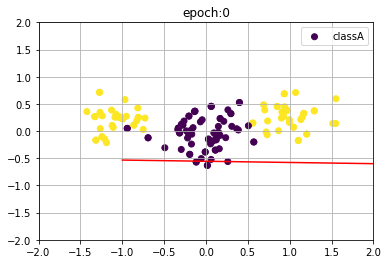

EPOCH=0, accuracy:
[[  5.33333333  94.66666667]
 [  0.         100.        ]]


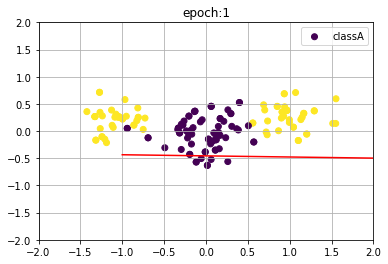

EPOCH=1, accuracy:
[[  9.33333333  90.66666667]
 [  0.         100.        ]]


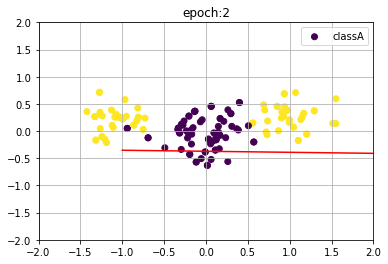

EPOCH=2, accuracy:
[[ 14.66666667  85.33333333]
 [  0.         100.        ]]


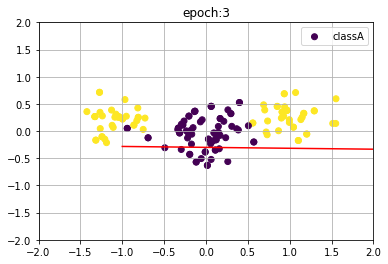

EPOCH=3, accuracy:
[[ 21.33333333  78.66666667]
 [  0.         100.        ]]


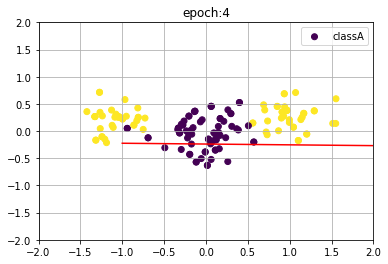

EPOCH=4, accuracy:
[[ 22.66666667  77.33333333]
 [  0.         100.        ]]


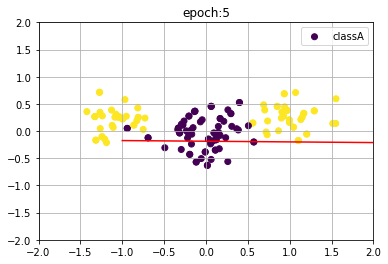

EPOCH=5, accuracy:
[[26.66666667 73.33333333]
 [ 1.33333333 98.66666667]]


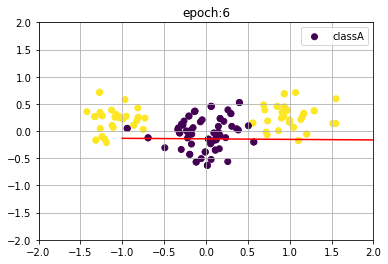

EPOCH=6, accuracy:
[[34.66666667 65.33333333]
 [ 8.         92.        ]]


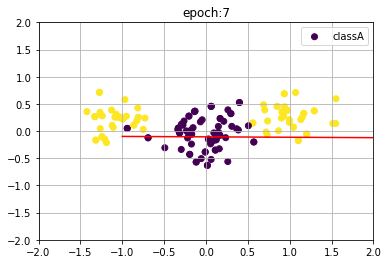

EPOCH=7, accuracy:
[[41.33333333 58.66666667]
 [10.66666667 89.33333333]]


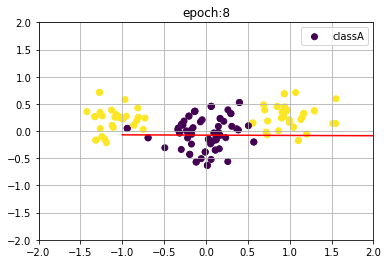

EPOCH=8, accuracy:
[[42.66666667 57.33333333]
 [10.66666667 89.33333333]]


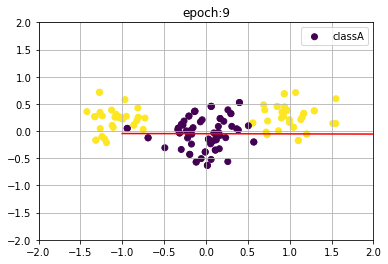

EPOCH=9, accuracy:
[[45.33333333 54.66666667]
 [14.66666667 85.33333333]]


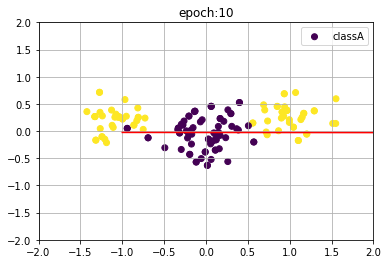

EPOCH=10, accuracy:
[[52.         48.        ]
 [14.66666667 85.33333333]]


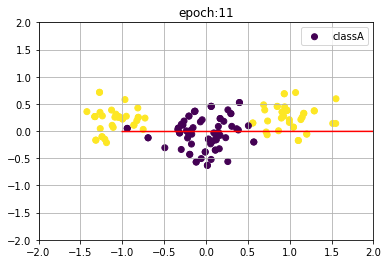

EPOCH=11, accuracy:
[[52. 48.]
 [16. 84.]]


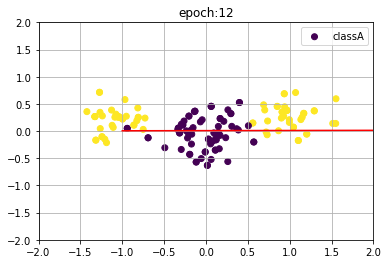

EPOCH=12, accuracy:
[[53.33333333 46.66666667]
 [17.33333333 82.66666667]]


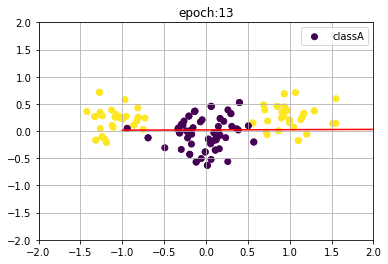

EPOCH=13, accuracy:
[[57.33333333 42.66666667]
 [17.33333333 82.66666667]]


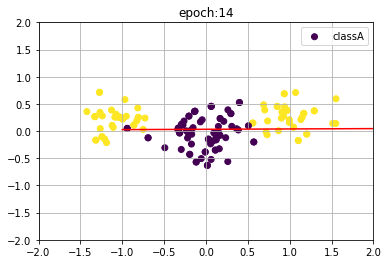

EPOCH=14, accuracy:
[[58.66666667 41.33333333]
 [17.33333333 82.66666667]]


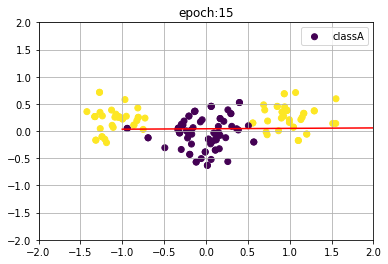

EPOCH=15, accuracy:
[[60.         40.        ]
 [18.66666667 81.33333333]]


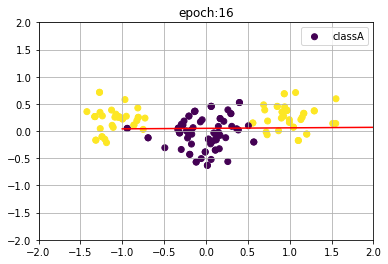

EPOCH=16, accuracy:
[[60.         40.        ]
 [18.66666667 81.33333333]]


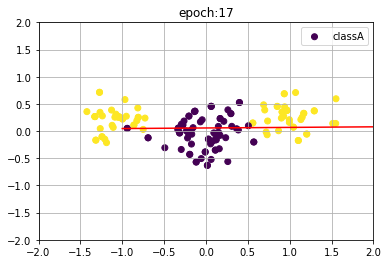

EPOCH=17, accuracy:
[[60.         40.        ]
 [18.66666667 81.33333333]]


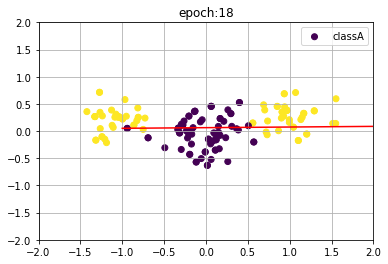

EPOCH=18, accuracy:
[[65.33333333 34.66666667]
 [22.66666667 77.33333333]]


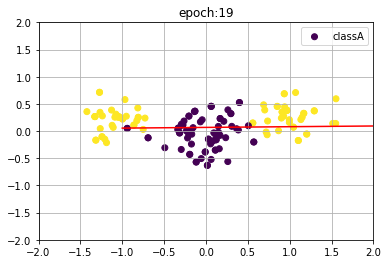

EPOCH=19, accuracy:
[[66.66666667 33.33333333]
 [22.66666667 77.33333333]]


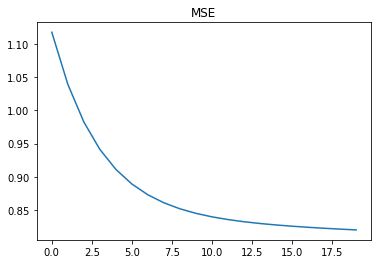

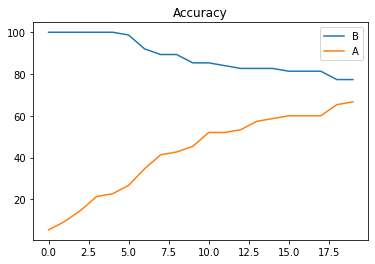

In [25]:
# Scénario 1

n = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

data_type = "linear"
#data_type = "nonlinear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
X, T = subsample(n, 1)
# X, T = subsample(n, 2)
# X, T = subsample(n, 3)
# X, T = subsample(n, 4)

epochs = 20
eta = 1e-3

W = rng.random((3))
N = X.shape[1]

#DELTA BATCH
plt.ion()

mse = []
accuracyA = []
accuracyB = []
for epoch in range(epochs):

    W += - eta * (W@X - T) @ X.T

    mse.append(np.mean((W @ X - T) ** 2))
    plt.clf()
    plot_data(X, T)
    plot_boundaries(W)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.title(f"epoch:{epoch}")
    plt.pause(0.2)

    print(f"EPOCH={epoch}, accuracy:")
    accuracy = missclassified_rate(X, T, W)
    print(accuracy)
    accuracyA.append(accuracy[1, 1])
    accuracyB.append(accuracy[0, 0])


plt.ioff()

plt.figure()
plt.plot(range(epochs), mse)
plt.title("MSE")
plt.show()

plt.figure()
plt.plot(range(epochs), accuracyA)
plt.plot(range(epochs), accuracyB)
plt.title("Accuracy")
plt.legend(["B", "A"])
plt.title("Comparison of accuracy for class A and B of Delta Rule in Batch mode")
plt.show()

(2, 50)
(2, 100)


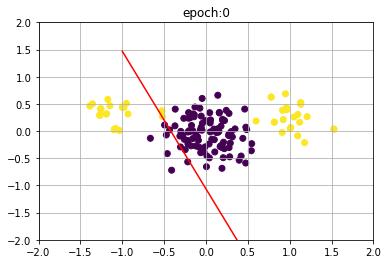

EPOCH=0, accuracy:
[[ 7. 93.]
 [44. 56.]]


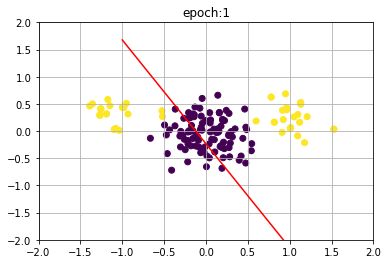

EPOCH=1, accuracy:
[[37. 63.]
 [48. 52.]]


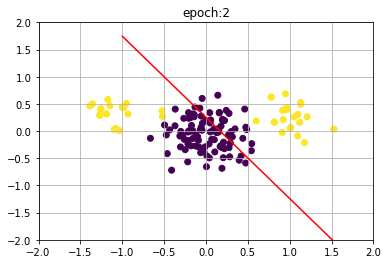

EPOCH=2, accuracy:
[[75. 25.]
 [48. 52.]]


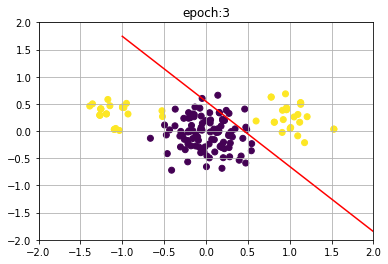

EPOCH=3, accuracy:
[[94.  6.]
 [48. 52.]]


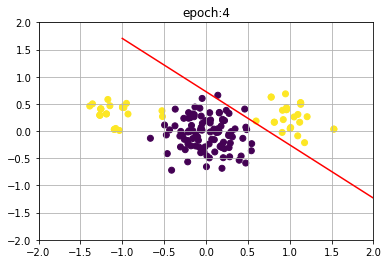

EPOCH=4, accuracy:
[[98.  2.]
 [48. 52.]]


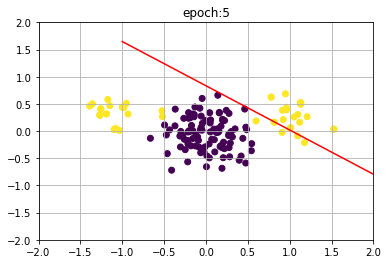

EPOCH=5, accuracy:
[[100.   0.]
 [ 60.  40.]]


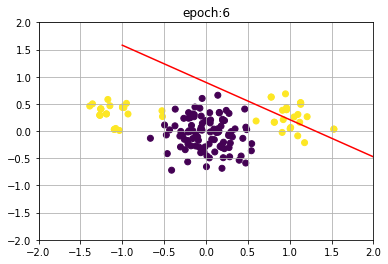

EPOCH=6, accuracy:
[[100.   0.]
 [ 66.  34.]]


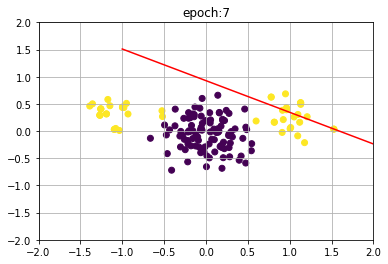

EPOCH=7, accuracy:
[[100.   0.]
 [ 76.  24.]]


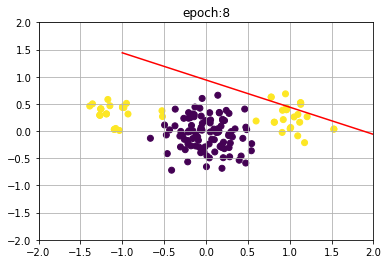

EPOCH=8, accuracy:
[[100.   0.]
 [ 86.  14.]]


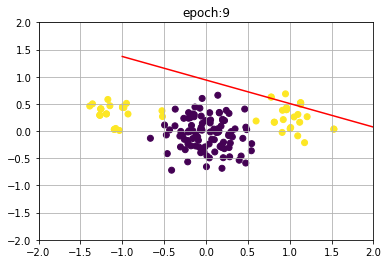

EPOCH=9, accuracy:
[[100.   0.]
 [ 86.  14.]]


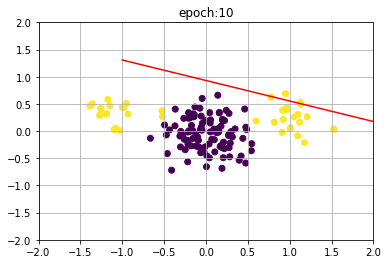

EPOCH=10, accuracy:
[[100.   0.]
 [ 92.   8.]]


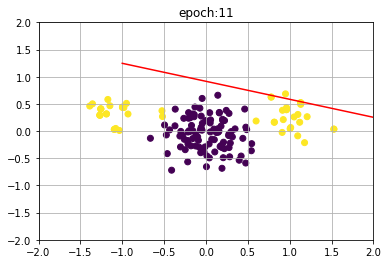

EPOCH=11, accuracy:
[[100.   0.]
 [ 98.   2.]]


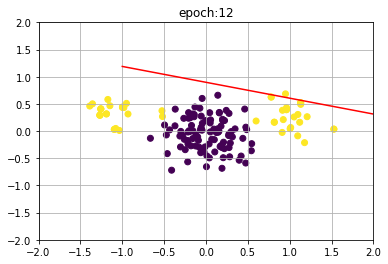

EPOCH=12, accuracy:
[[100.   0.]
 [ 98.   2.]]


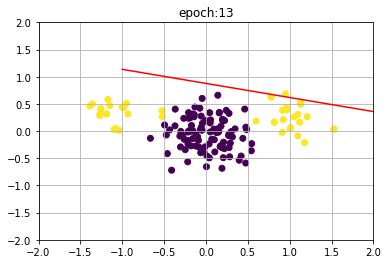

EPOCH=13, accuracy:
[[100.   0.]
 [ 98.   2.]]


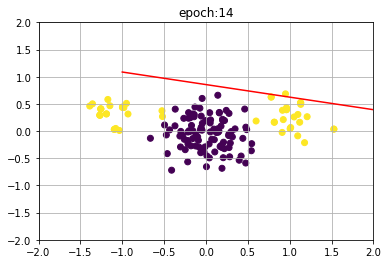

EPOCH=14, accuracy:
[[100.   0.]
 [ 98.   2.]]


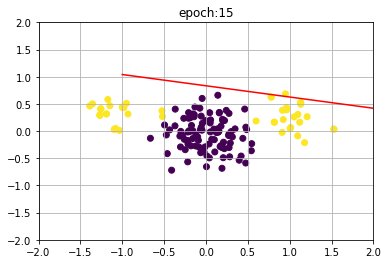

EPOCH=15, accuracy:
[[100.   0.]
 [ 98.   2.]]


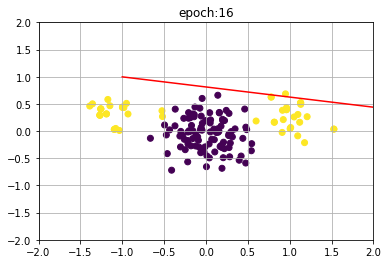

EPOCH=16, accuracy:
[[100.   0.]
 [ 98.   2.]]


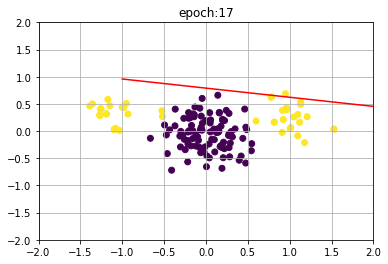

EPOCH=17, accuracy:
[[100.   0.]
 [ 98.   2.]]


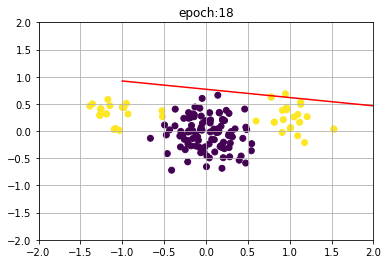

EPOCH=18, accuracy:
[[100.   0.]
 [ 98.   2.]]


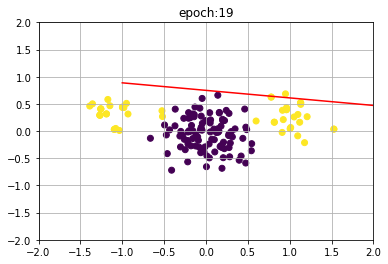

EPOCH=19, accuracy:
[[100.   0.]
 [ 98.   2.]]


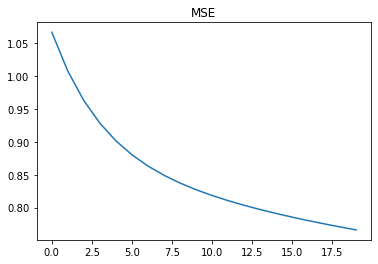

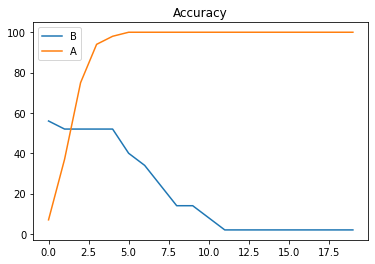

In [12]:
# Scénario 2

n = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

data_type = "linear"
#data_type = "nonlinear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
#X, T = subsample(n, 1)
X, T = subsample(n, 2)
# X, T = subsample(n, 3)
# X, T = subsample(n, 4)

epochs = 20
eta = 1e-3

W = rng.random((3))
N = X.shape[1]

#DELTA BATCH
plt.ion()

mse = []
accuracyA = []
accuracyB = []
for epoch in range(epochs):

    W += - eta * (W@X - T) @ X.T

    mse.append(np.mean((W @ X - T) ** 2))
    plt.clf()
    plot_data(X, T)
    plot_boundaries(W)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.title(f"epoch:{epoch}")
    plt.pause(0.2)

    print(f"EPOCH={epoch}, accuracy:")
    accuracy = missclassified_rate(X, T, W)
    print(accuracy)
    accuracyA.append(accuracy[1, 1])
    accuracyB.append(accuracy[0, 0])


plt.ioff()

plt.figure()
plt.plot(range(epochs), mse)
plt.title("MSE")
plt.show()

plt.figure()
plt.plot(range(epochs), accuracyA)
plt.plot(range(epochs), accuracyB)
plt.title("Accuracy")
plt.legend(["B", "A"])
plt.show()

(2, 100)
(2, 50)


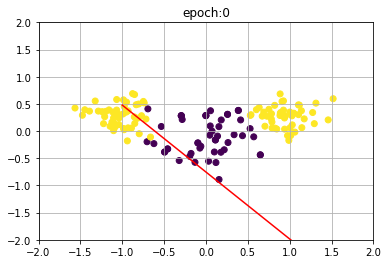

EPOCH=0, accuracy:
[[14. 86.]
 [38. 62.]]


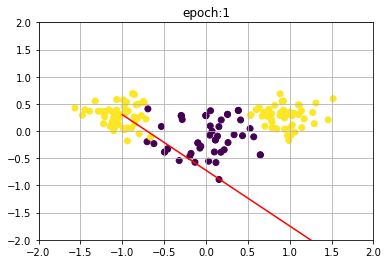

EPOCH=1, accuracy:
[[16. 84.]
 [32. 68.]]


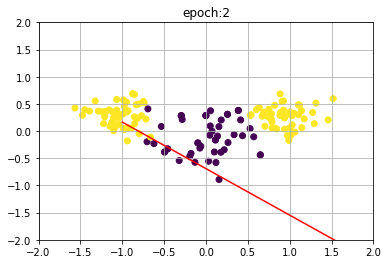

EPOCH=2, accuracy:
[[16. 84.]
 [22. 78.]]


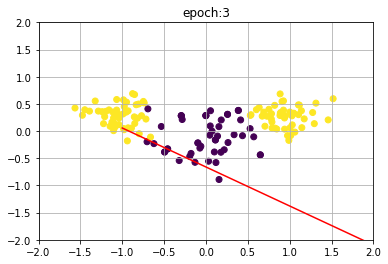

EPOCH=3, accuracy:
[[14. 86.]
 [ 8. 92.]]


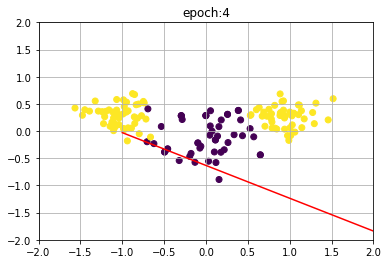

EPOCH=4, accuracy:
[[10. 90.]
 [ 2. 98.]]


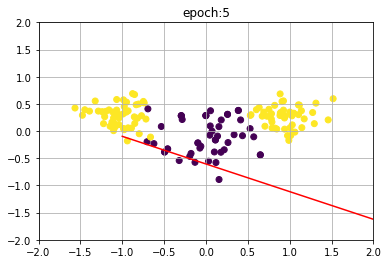

EPOCH=5, accuracy:
[[10. 90.]
 [ 1. 99.]]


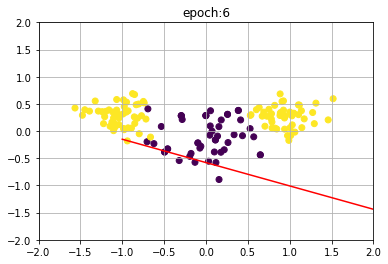

EPOCH=6, accuracy:
[[10. 90.]
 [ 1. 99.]]


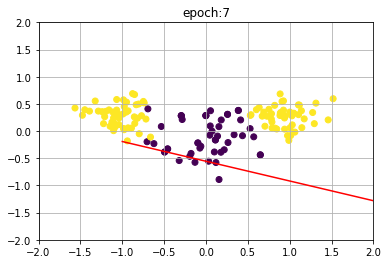

EPOCH=7, accuracy:
[[ 10.  90.]
 [  0. 100.]]


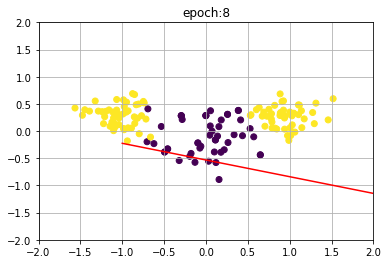

EPOCH=8, accuracy:
[[ 14.  86.]
 [  0. 100.]]


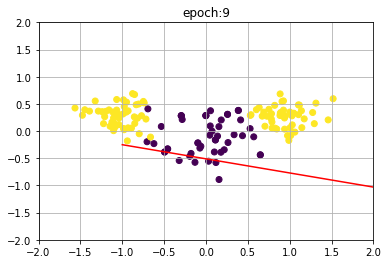

EPOCH=9, accuracy:
[[ 16.  84.]
 [  0. 100.]]


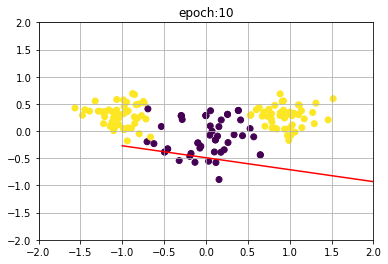

EPOCH=10, accuracy:
[[ 16.  84.]
 [  0. 100.]]


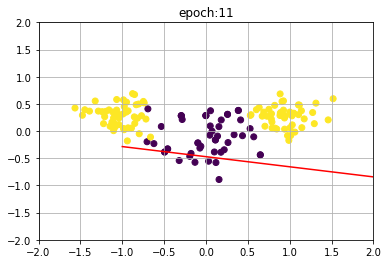

EPOCH=11, accuracy:
[[ 16.  84.]
 [  0. 100.]]


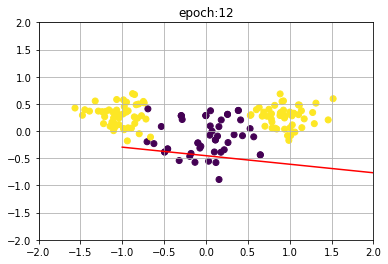

EPOCH=12, accuracy:
[[ 16.  84.]
 [  0. 100.]]


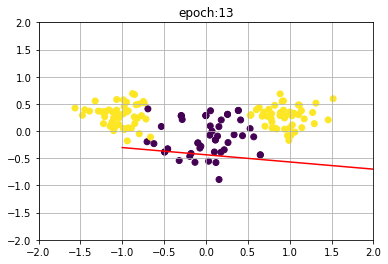

EPOCH=13, accuracy:
[[ 16.  84.]
 [  0. 100.]]


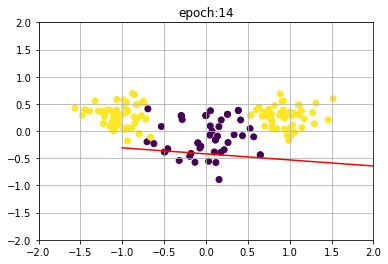

EPOCH=14, accuracy:
[[ 18.  82.]
 [  0. 100.]]


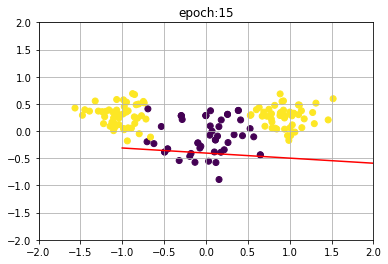

EPOCH=15, accuracy:
[[ 18.  82.]
 [  0. 100.]]


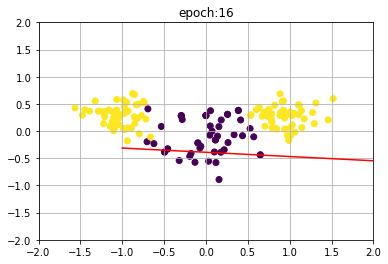

EPOCH=16, accuracy:
[[ 18.  82.]
 [  0. 100.]]


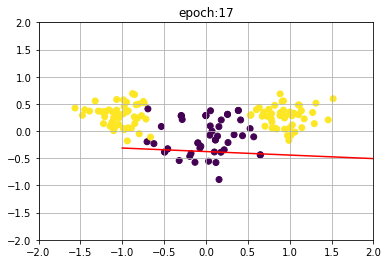

EPOCH=17, accuracy:
[[ 26.  74.]
 [  0. 100.]]


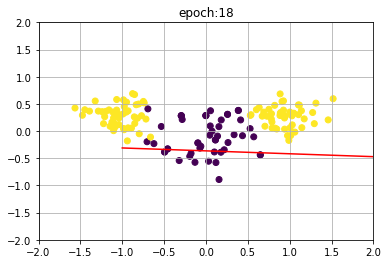

EPOCH=18, accuracy:
[[ 26.  74.]
 [  0. 100.]]


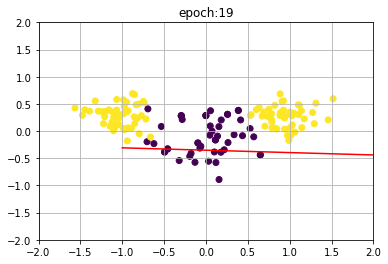

EPOCH=19, accuracy:
[[ 26.  74.]
 [  0. 100.]]


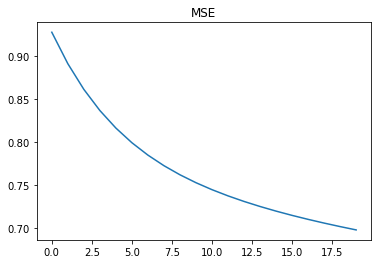

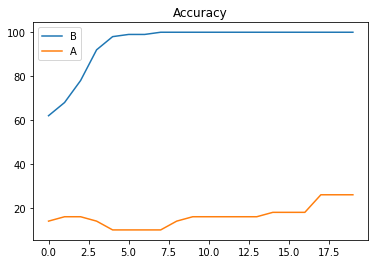

In [13]:
# Scénario 3

n = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

data_type = "linear"
#data_type = "nonlinear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
# X, T = subsample(n, 1)
# X, T = subsample(n, 2)
X, T = subsample(n, 3)
# X, T = subsample(n, 4)

epochs = 20
eta = 1e-3

W = rng.random((3))
N = X.shape[1]

#DELTA BATCH
plt.ion()

mse = []
accuracyA = []
accuracyB = []
for epoch in range(epochs):

    W += - eta * (W@X - T) @ X.T

    mse.append(np.mean((W @ X - T) ** 2))
    plt.clf()
    plot_data(X, T)
    plot_boundaries(W)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.title(f"epoch:{epoch}")
    plt.pause(0.2)

    print(f"EPOCH={epoch}, accuracy:")
    accuracy = missclassified_rate(X, T, W)
    print(accuracy)
    accuracyA.append(accuracy[1, 1])
    accuracyB.append(accuracy[0, 0])


plt.ioff()

plt.figure()
plt.plot(range(epochs), mse)
plt.title("MSE")
plt.show()

plt.figure()
plt.plot(range(epochs), accuracyA)
plt.plot(range(epochs), accuracyB)
plt.title("Accuracy")
plt.legend(["B", "A"])
plt.show()

(2, 50)
(2, 100)


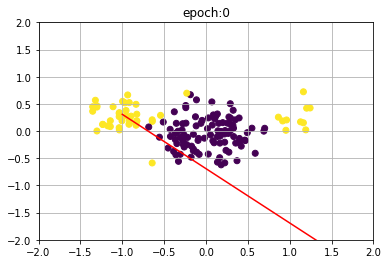

EPOCH=0, accuracy:
[[ 5. 95.]
 [46. 54.]]


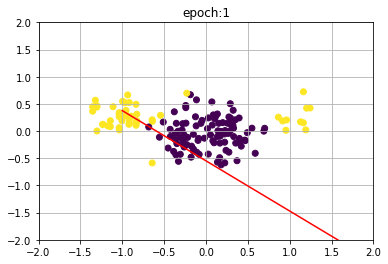

EPOCH=1, accuracy:
[[ 9. 91.]
 [56. 44.]]


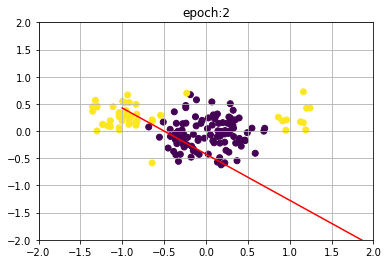

EPOCH=2, accuracy:
[[20. 80.]
 [58. 42.]]


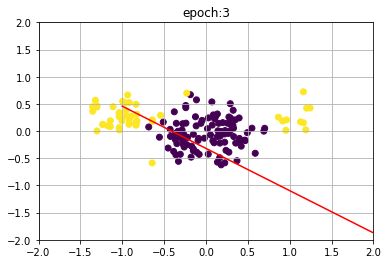

EPOCH=3, accuracy:
[[29. 71.]
 [62. 38.]]


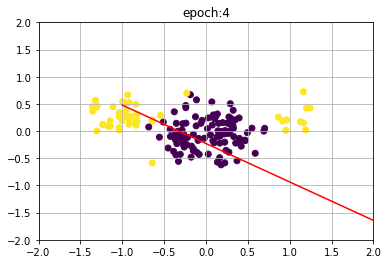

EPOCH=4, accuracy:
[[35. 65.]
 [64. 36.]]


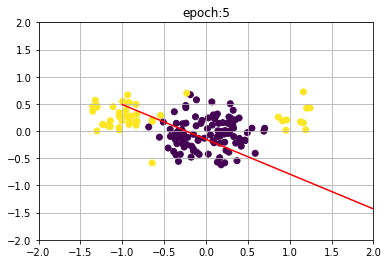

EPOCH=5, accuracy:
[[42. 58.]
 [64. 36.]]


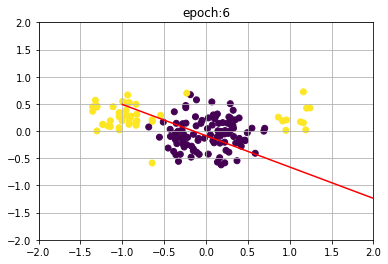

EPOCH=6, accuracy:
[[45. 55.]
 [64. 36.]]


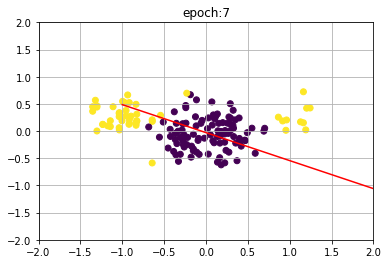

EPOCH=7, accuracy:
[[52. 48.]
 [64. 36.]]


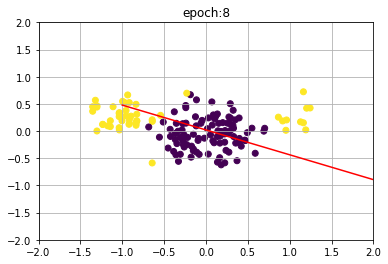

EPOCH=8, accuracy:
[[55. 45.]
 [64. 36.]]


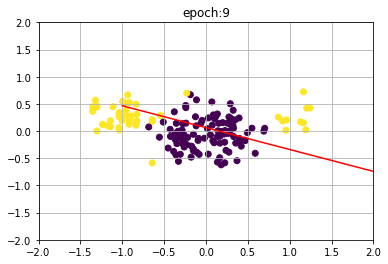

EPOCH=9, accuracy:
[[65. 35.]
 [64. 36.]]


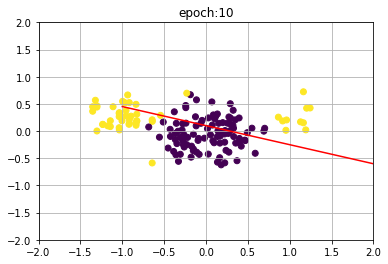

EPOCH=10, accuracy:
[[68. 32.]
 [64. 36.]]


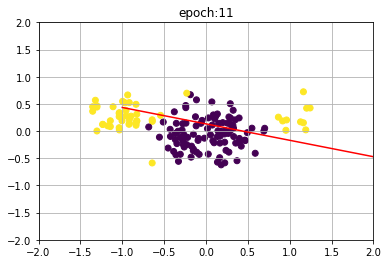

EPOCH=11, accuracy:
[[71. 29.]
 [64. 36.]]


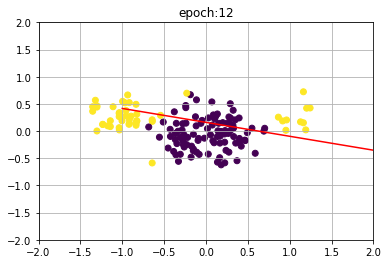

EPOCH=12, accuracy:
[[73. 27.]
 [62. 38.]]


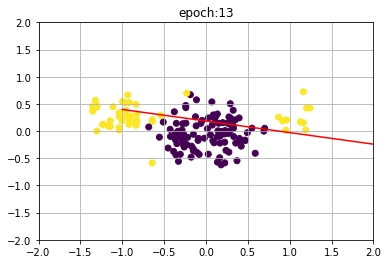

EPOCH=13, accuracy:
[[77. 23.]
 [60. 40.]]


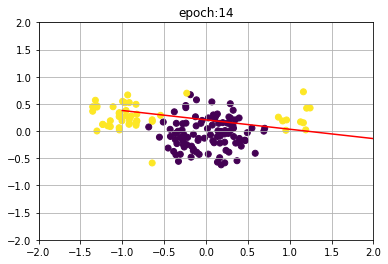

EPOCH=14, accuracy:
[[82. 18.]
 [56. 44.]]


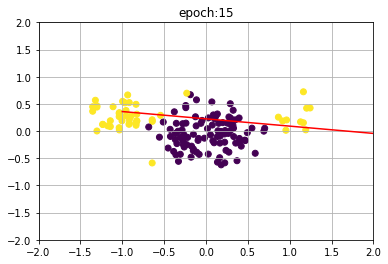

EPOCH=15, accuracy:
[[82. 18.]
 [58. 42.]]


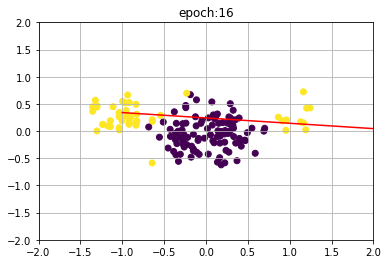

EPOCH=16, accuracy:
[[84. 16.]
 [58. 42.]]


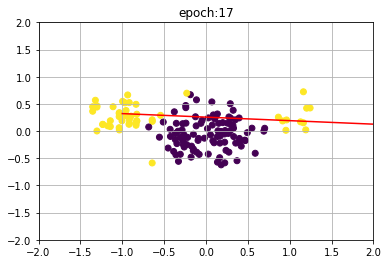

EPOCH=17, accuracy:
[[87. 13.]
 [56. 44.]]


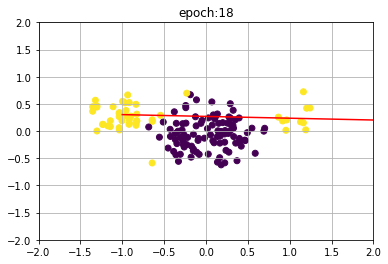

EPOCH=18, accuracy:
[[89. 11.]
 [56. 44.]]


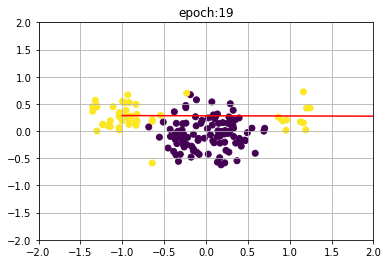

EPOCH=19, accuracy:
[[90. 10.]
 [58. 42.]]


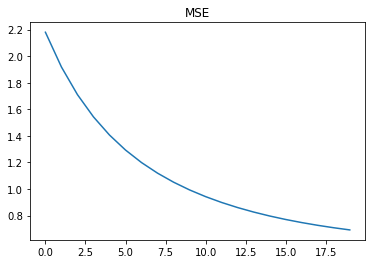

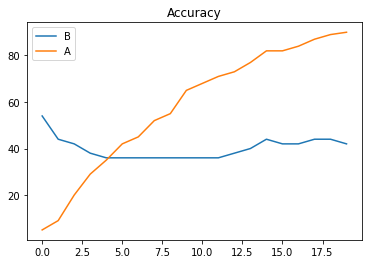

In [14]:
# Scénario 4

n = 100
mA = np.array([[1.0], [0.3]])
mB = np.array([[0.0], [-0.1]])
sigmaA = 0.2
sigmaB = 0.3

data_type = "linear"
#data_type = "nonlinear"
rng = np.random.default_rng()

X, T = new_data(mA, mB, sigmaA, sigmaB, n, data_type, rng)
# X, T = subsample(n, 1)
# X, T = subsample(n, 2)
# X, T = subsample(n, 3)
X, T = subsample(n, 4)

epochs = 20
eta = 1e-3

W = rng.random((3))
N = X.shape[1]

#DELTA BATCH
plt.ion()

mse = []
accuracyA = []
accuracyB = []
for epoch in range(epochs):

    W += - eta * (W@X - T) @ X.T

    mse.append(np.mean((W @ X - T) ** 2))
    plt.clf()
    plot_data(X, T)
    plot_boundaries(W)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.title(f"epoch:{epoch}")
    plt.pause(0.2)

    print(f"EPOCH={epoch}, accuracy:")
    accuracy = missclassified_rate(X, T, W)
    print(accuracy)
    accuracyA.append(accuracy[1, 1])
    accuracyB.append(accuracy[0, 0])


plt.ioff()

plt.figure()
plt.plot(range(epochs), mse)
plt.title("MSE")
plt.show()

plt.figure()
plt.plot(range(epochs), accuracyA)
plt.plot(range(epochs), accuracyB)
plt.title("Accuracy")
plt.legend(["B", "A"])
plt.show()